# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook demonstrates how to access and visualize data from Dandiset 001361, "A flexible hippocampal population code for experience relative to reward".

More information about this Dandiset can be found at: https://dandiarchive.org/dandiset/001361

This notebook will cover the following:

1.  Loading the Dandiset metadata using the DANDI API.
2.  Listing the assets (files) within the Dandiset.
3.  Loading an NWB file and exploring its contents, including:
    *   Basic metadata
    *   Behavioral data (position, reward)
    *   Electrophysiology data (TwoPhotonSeries)
    *   Optical Physiology data (Fluorescence)

### Required Packages

The following packages are required to run this notebook. Please make sure they are installed in your environment.

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

In [1]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

### Loading the Dandiset metadata

We will use the DANDI API to load the Dandiset metadata.

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

Found 152 assets in the dataset

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb


### Loading an NWB file and exploring its contents

We will now load one of the NWB files in the Dandiset and explore its contents.

The file we will load is: `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`

This file can be accessed via the URL: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Added mode='r'
nwb = io.read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data
Experimenter: ('Mari Sosa',)
Session start time: 2023-02-23 00:00:00-08:00


### Exploring behavioral data

We will now explore the behavioral data in the NWB file, including position, reward, etc.

In [4]:
# Access behavioral time series data
position = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["position"]
reward = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["Reward"]

# Print basic information about the position data
print(f"Position data shape: {position.data.shape}")
print(f"Position unit: {position.unit}")
print(f"Position timestamps shape: {position.timestamps.shape}")

# Print basic information about the reward data
print(f"Reward data shape: {reward.data.shape}")
print(f"Reward unit: {reward.unit}")
print(f"Reward timestamps shape: {reward.timestamps.shape}")

Position data shape: (20684,)
Position unit: cm
Position timestamps shape: (20684,)
Reward data shape: (69,)
Reward unit: mL
Reward timestamps shape: (69,)


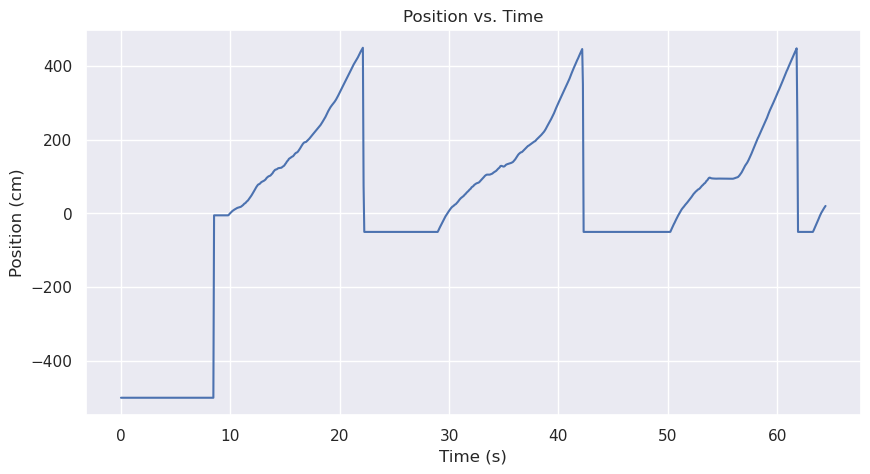

In [5]:
# Plot the position data
plt.figure(figsize=(10, 5))
plt.plot(position.timestamps[:1000], position.data[:1000])  # Plotting only the first 1000 timestamps
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title("Position vs. Time")
plt.show()

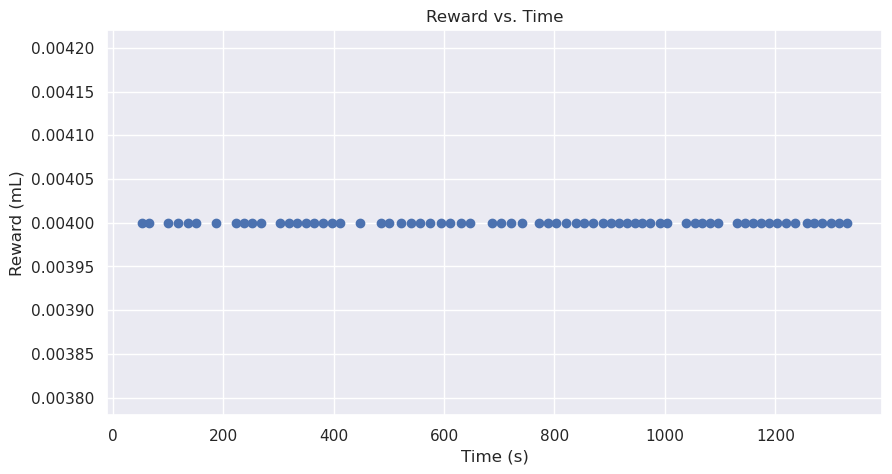

In [6]:
# Plot the reward data
plt.figure(figsize=(10, 5))
plt.plot(reward.timestamps[:].reshape(-1), reward.data[:].reshape(-1), 'o')
plt.xlabel("Time (s)")
plt.ylabel("Reward (mL)")
plt.title("Reward vs. Time")
plt.show()

### Exploring electrophysiology data (TwoPhotonSeries)

We will now explore the electrophysiology data in the NWB file.

In [7]:
# Access electrophysiology data
two_photon_series = nwb.acquisition["TwoPhotonSeries"]

# Print basic information about the electrophysiology data
print(f"TwoPhotonSeries data shape: {two_photon_series.data.shape}")
print(f"TwoPhotonSeries rate: {two_photon_series.rate}")
print(f"TwoPhotonSeries unit: {two_photon_series.unit}")

TwoPhotonSeries data shape: (1, 1, 1)
TwoPhotonSeries rate: 15.5078125
TwoPhotonSeries unit: volt


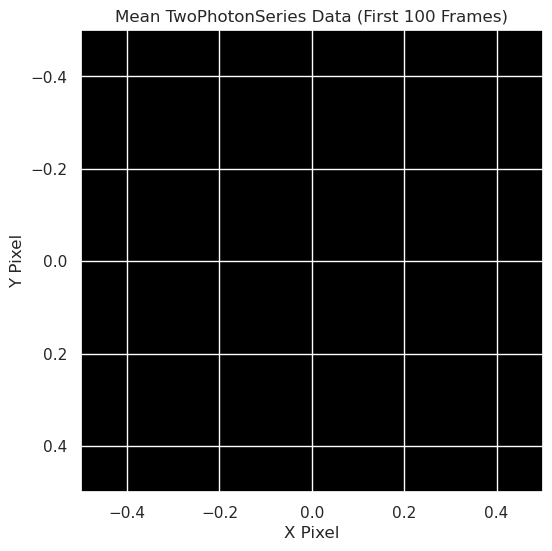

In [8]:
# Plot the electrophysiology data (first 100 frames)
plt.figure(figsize=(8, 6))
plt.imshow(np.mean(two_photon_series.data[:100, :, :], axis=0), cmap='gray') # use gray colormap for image data
plt.title('Mean TwoPhotonSeries Data (First 100 Frames)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

### Exploring optical physiology data (Fluorescence)

We will now explore the optical physiology data in the NWB file.

In [9]:
# Access optical physiology data
fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["plane0"]

# Print basic information about the optical physiology data
print(f"Fluorescence data shape: {fluorescence.data.shape}")
print(f"Fluorescence rate: {fluorescence.rate}")
print(f"Fluorescence unit: {fluorescence.unit}")
print(f"Fluorescence ROIs table columns: {fluorescence.rois.table.colnames}")

Fluorescence data shape: (19818, 349)
Fluorescence rate: 15.5078125
Fluorescence unit: lumens
Fluorescence ROIs table columns: ('pixel_mask', 'iscell', 'planeIdx')


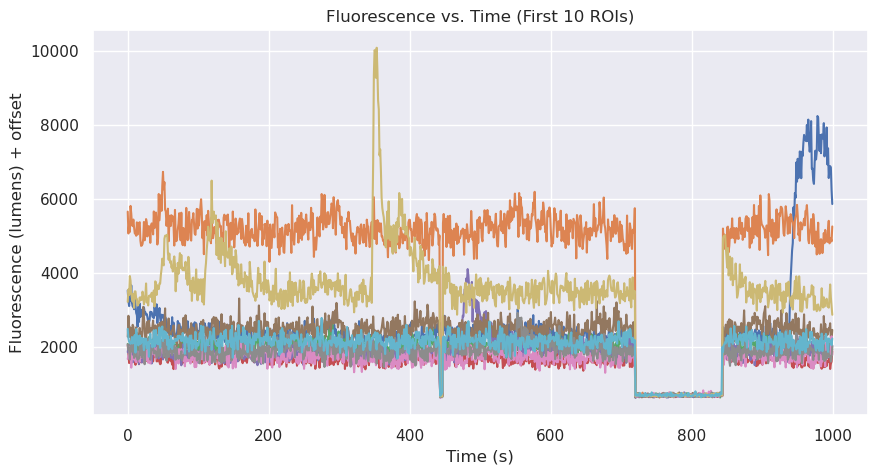

In [10]:
# Plot the fluorescence data (first 10 ROIs traces)
plt.figure(figsize=(10, 5))
for i in range(min(10, fluorescence.data.shape[1])):  # Plotting only the first 10 ROIs
    plt.plot(fluorescence.data[:1000, i] + i*2)  # Plotting only the first 1000 timestamps
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (lumens) + offset")
plt.title("Fluorescence vs. Time (First 10 ROIs)")
plt.show()

### Exploring Image Segmentation data (ImageSegmentation)

We will now explore the image segmentation data in the NWB file.

In [11]:
# Access image segmentation data
image_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]

# Print basic information about the image segmenation data
print(f"ImageSegmentation columns: {image_segmentation.colnames}")

ImageSegmentation columns: ('pixel_mask', 'iscell', 'planeIdx')


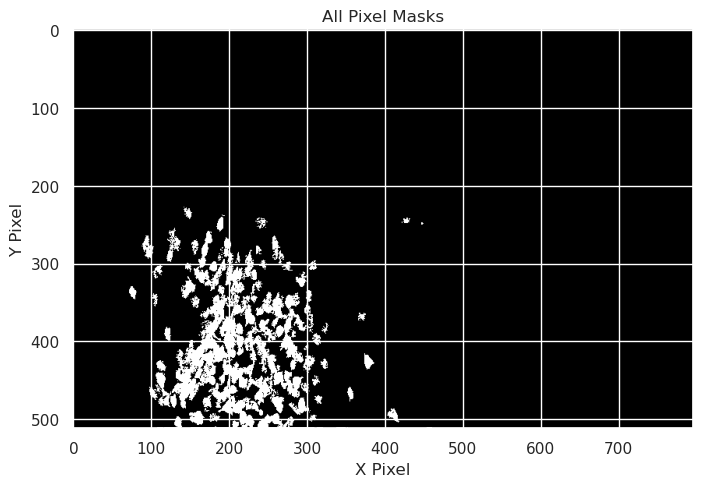

In [12]:
# The pixel masks are stored as indices into a vector.  Let's show those pixel masks.
plt.figure(figsize=(8, 6))
pixel_masks = image_segmentation['pixel_mask']
num_masks = len(pixel_masks)
img = np.zeros(two_photon_series.dimension[:])
for mask in pixel_masks:
    for px in mask:
        y = min(px[1], img.shape[0] - 1)
        x = min(px[0], img.shape[1] - 1)
        img[y, x] = 1
plt.imshow(img, cmap='gray')  # use gray colormap for image data
plt.title('All Pixel Masks')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

### Summary of Findings

We have successfully loaded and explored data from Dandiset 001361. We were able to:

*   Load the Dandiset metadata using the DANDI API.
*   List the assets (files) within the Dandiset.
*   Load an NWB file and explore its contents, including basic metadata, behavioral data, TwoPhotonSeries electrophysiology data, and Fluorescence optical physiology data.

### Possible Future Directions for Analysis

Here are some possible future directions for analysis:

*   Explore the relationship between behavior and neural activity.
*   Perform more advanced analysis of the electrophysiology data, such as spike sorting.
*   Compare data across different sessions or subjects.
*   Use machine learning techniques to identify patterns in the data.